# YOLO WORLD

## Libraries

In [1]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

## Model

In [2]:
from ultralytics import YOLOWorld

model = YOLOWorld("yolov8m-worldv2.pt")

## Prompts

In [3]:
satellite_prompts = [
    "Venus Express satellite, scientific spacecraft with solar panels in orbit",
    "CHEOPS space telescope, compact exoplanet observation satellite in space",
    "LISA Pathfinder satellite, scientific technology demonstration spacecraft",
    "Earth observation satellite, box-shaped spacecraft in low Earth orbit",
    "PROBA-2 satellite, small scientific spacecraft in Earth orbit",
    "PROBA-3 satellite, formation flying scientific spacecraft in orbit",
    "PROBA-3 OCS satellite, formation flying spacecraft with external structures",
    "SMART-1 satellite, small scientific spacecraft with solar panels",
    "SOHO space observatory, large solar observation spacecraft in space",
    "XMM-Newton space telescope, large X-ray observatory spacecraft"
]

generic_prompt = [
    "a satellite in space"
]

very_generic_prompt = [
    "an object floating in space",
]

## Run yolo inferences

In [5]:
model.set_classes(satellite_prompts)

results_satellite = model.predict(
    source="spark-yolo-10%/images/val",
    conf=0.01,
    iou=0.5,
    save=True
)


WARNING 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/2000 c:\Users\tomma\OneDrive - Universita degli Studi Roma Tre\Desktop\AI_LUX\CV\PROJECT_SPARK\spark-yolo-10%\images\val\Cheops_val_image_00117_img.jpg: 640x640 1 CHEOPS space telescope, compact exoplanet observation satellite in space, 19.9ms
image 2/2000 c:\Users\tomma\OneDrive - Universita degli Studi Roma Tre\Desktop\AI_LUX\CV\PROJECT_SPARK\spark-yolo-10%\images\val\Cheops_val_image_00216_img.jpg: 640x640 (no detections), 19.7ms
image 3/2000 c

In [4]:
model.set_classes(generic_prompt)

results_generic = model.predict(
    source="spark-yolo-10%/images/val",
    conf=0.01,
    iou=0.5,
    save=True
)


WARNING 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/2000 c:\Users\tomma\OneDrive - Universita degli Studi Roma Tre\Desktop\AI_LUX\CV\PROJECT_SPARK\spark-yolo-10%\images\val\Cheops_val_image_00117_img.jpg: 640x640 (no detections), 19.7ms
image 2/2000 c:\Users\tomma\OneDrive - Universita degli Studi Roma Tre\Desktop\AI_LUX\CV\PROJECT_SPARK\spark-yolo-10%\images\val\Cheops_val_image_00216_img.jpg: 640x640 (no detections), 20.2ms
image 3/2000 c:\Users\tomma\OneDrive - Universita degli Studi Roma Tre\De

In [4]:
model.set_classes(very_generic_prompt)

results_very_generic = model.predict(
    source="spark-yolo-10%/images/val",
    conf=0.01,
    iou=0.5,
    save=True
)


WARNING 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/2000 c:\Users\tomma\OneDrive - Universita degli Studi Roma Tre\Desktop\AI_LUX\CV\PROJECT_SPARK\spark-yolo-10%\images\val\Cheops_val_image_00117_img.jpg: 640x640 1 an object floating in space, 19.7ms
image 2/2000 c:\Users\tomma\OneDrive - Universita degli Studi Roma Tre\Desktop\AI_LUX\CV\PROJECT_SPARK\spark-yolo-10%\images\val\Cheops_val_image_00216_img.jpg: 640x640 1 an object floating in space, 19.8ms
image 3/2000 c:\Users\tomma\OneDrive - Univer

In [11]:
import pickle

with open("results_satellite.pkl", "rb") as f:
    results_satellite = pickle.load(f)

with open("results_generic.pkl", "rb") as f:
    results_generic = pickle.load(f)

with open("results_very_generic.pkl", "rb") as f:
    results_very_generic = pickle.load(f)

## Results

In [12]:
def detection_stats(results):
    """
    Prints:
    - number of images with at least one detection
    - average confidence over all detected boxes
    """

    images_with_det = 0
    total_boxes = 0
    conf_sum = 0.0

    for r in results:
        if r.boxes is not None and len(r.boxes) > 0:
            images_with_det += 1

            # r.boxes.conf is a tensor of confidence scores
            for c in r.boxes.conf:
                conf_sum += float(c)
                total_boxes += 1

    if total_boxes > 0:
        avg_conf = conf_sum / total_boxes
    else:
        avg_conf = 0.0

    print(f"Images with ≥1 detection: {images_with_det}/{len(results)}")
    print(f"Total detected boxes: {total_boxes}")
    print(f"Average confidence: {avg_conf:.4f}")

    return images_with_det, total_boxes, avg_conf


In [24]:
import os
import cv2
import random
import matplotlib.pyplot as plt


def plot_8_random_predictions_vs_gt(
    results,
    gt_label_dir="spark-yolo-10%/labels/val",
    max_images=8
):
    """
    Plots 8 random images with:
    - YOLO-World predictions (red)
    - Ground truth boxes (green)
    in a 2x4 grid.
    """

    # select images with detections
    detected_results = [
        r for r in results
        if r.boxes is not None and len(r.boxes) > 0
    ]

    if len(detected_results) == 0:
        print("No images with detections found.")
        return

    # random sampling (without replacement)
    selected_results = random.sample(
        detected_results,
        min(max_images, len(detected_results))
    )

    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    axes = axes.flatten()

    for ax, r in zip(axes, selected_results):
        img_path = r.path
        img_name = os.path.basename(img_path)

        # load image
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w, _ = img.shape

        # GT label path
        label_path = os.path.join(
            gt_label_dir,
            img_name.replace(".jpg", ".txt")
        )

        # draw GT boxes (green)
        if os.path.exists(label_path):
            with open(label_path, "r") as f:
                for line in f:
                    _, xc, yc, bw, bh = map(float, line.split())

                    x1 = int((xc - bw / 2) * w)
                    y1 = int((yc - bh / 2) * h)
                    x2 = int((xc + bw / 2) * w)
                    y2 = int((yc + bh / 2) * h)

                    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # draw predicted boxes (red)
        for box in r.boxes.xyxy:
            x1, y1, x2, y2 = map(int, box)
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

        ax.imshow(img)
        ax.axis("off")
        ax.set_title(img_name, fontsize=8)

    # hide empty subplots (if any)
    for ax in axes[len(selected_results):]:
        ax.axis("off")

    plt.suptitle(
        "YOLO-World predictions (red) vs Ground Truth (green)",
        fontsize=14
    )
    plt.tight_layout()
    plt.show()


In [37]:
stats1 = detection_stats(results_satellite)

Images with ≥1 detection: 1073/2000
Total detected boxes: 1433
Average confidence: 0.0597


In [38]:
stats2 = detection_stats(results_generic)

Images with ≥1 detection: 362/2000
Total detected boxes: 364
Average confidence: 0.0334


In [39]:
stats3 = detection_stats(results_very_generic)

Images with ≥1 detection: 1273/2000
Total detected boxes: 1356
Average confidence: 0.0452


## Other plots

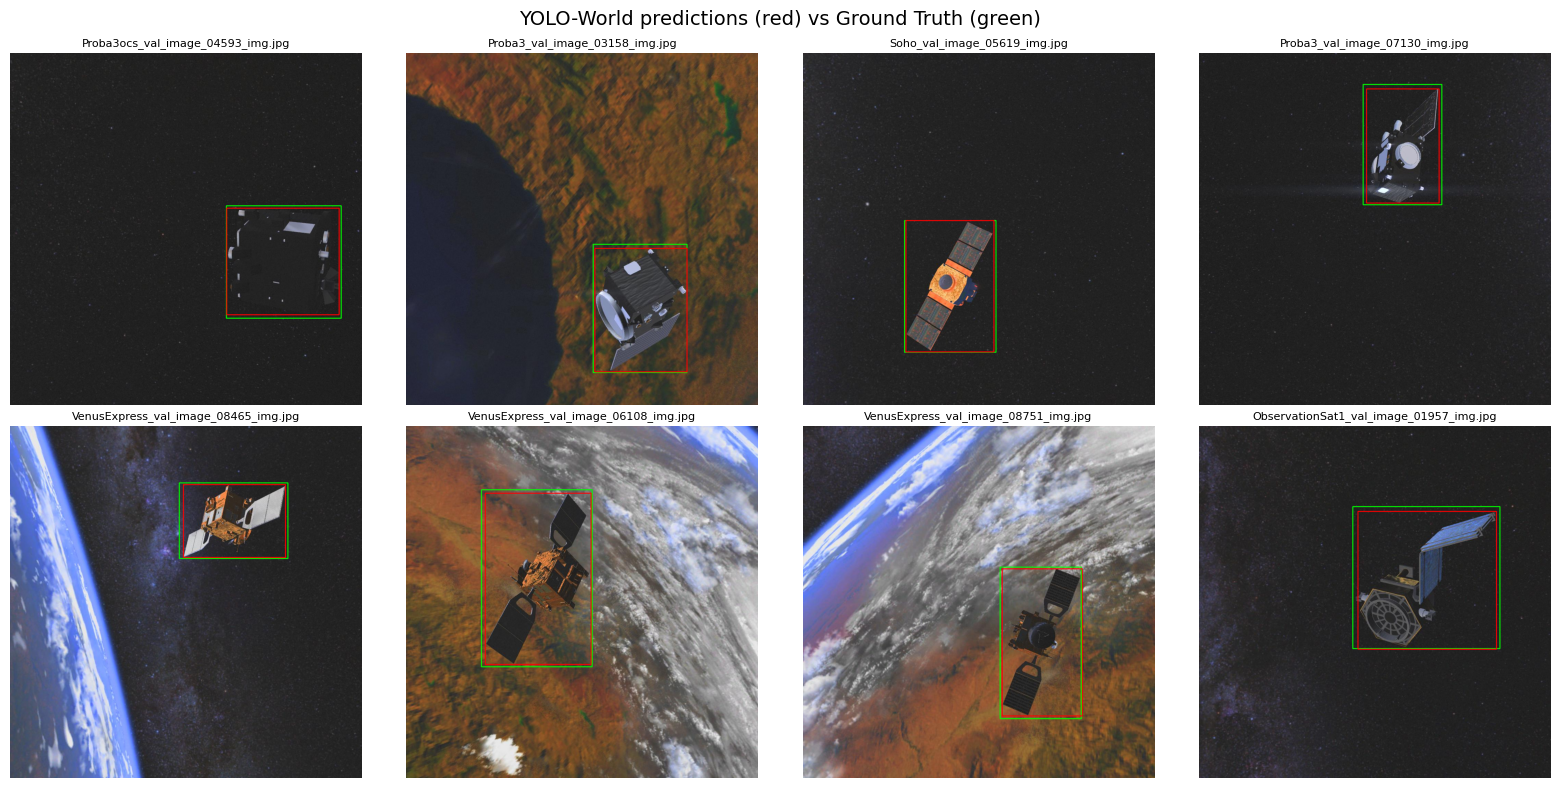

In [31]:
plot_8_random_predictions_vs_gt(results_generic)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


def plot_confidence_distribution(results, title="", bins=40):
    confidences = []

    for r in results:
        if r.boxes is not None and len(r.boxes) > 0:
            confidences.extend([float(c) for c in r.boxes.conf])

    if len(confidences) == 0:
        print("No confidence values found.")
        return

    confidences = np.array(confidences)

    plt.figure(figsize=(7, 5))
    sns.histplot(
        confidences,
        bins=bins,
        stat="density",
        kde=True,
        color="steelblue",
        edgecolor="black"
    )

    plt.xlim(0.0, 0.3)
    plt.xlabel("Confidence score")
    plt.ylabel("Density")
    plt.title(title)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()



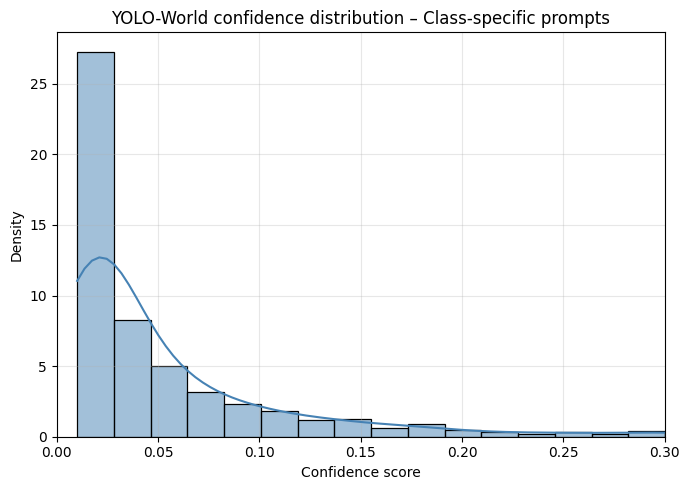

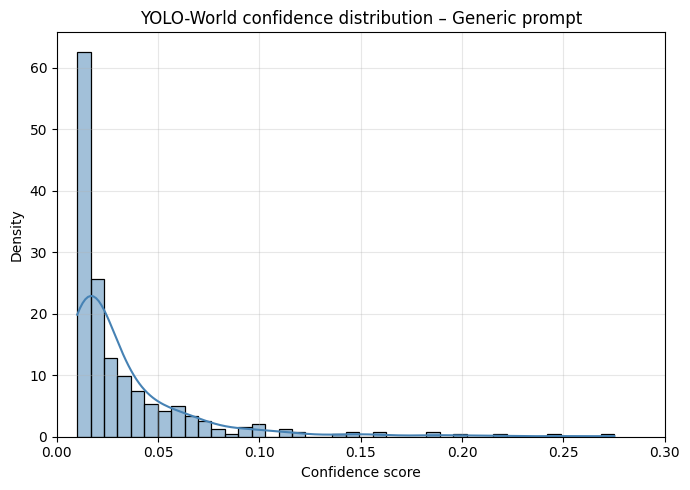

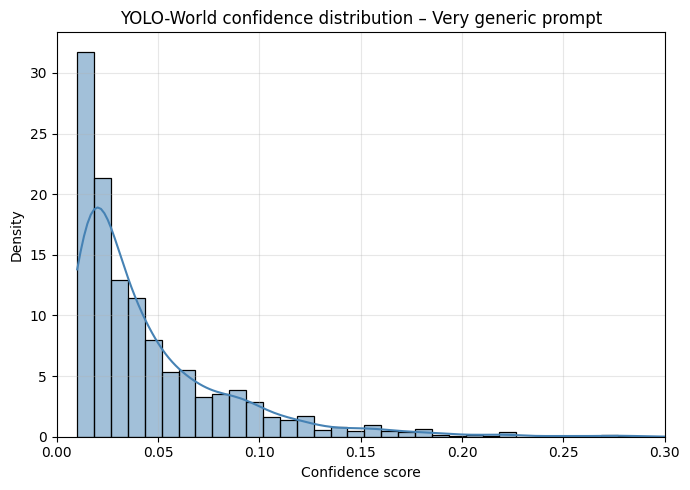

In [36]:
plot_confidence_distribution(
    results_satellite,
    title="YOLO-World confidence distribution – Class-specific prompts"
)

plot_confidence_distribution(
    results_generic,
    title="YOLO-World confidence distribution – Generic prompt"
)

plot_confidence_distribution(
    results_very_generic,
    title="YOLO-World confidence distribution – Very generic prompt"
)


In [40]:
prompt_types = [
    "Class-specific",
    "Generic (satellite)",
    "Very generic (object)"
]

images_with_det = [1073, 362, 1273]
avg_conf = [0.0597, 0.0334, 0.0452]

total_images = 2000
coverage = [x / total_images * 100 for x in images_with_det]


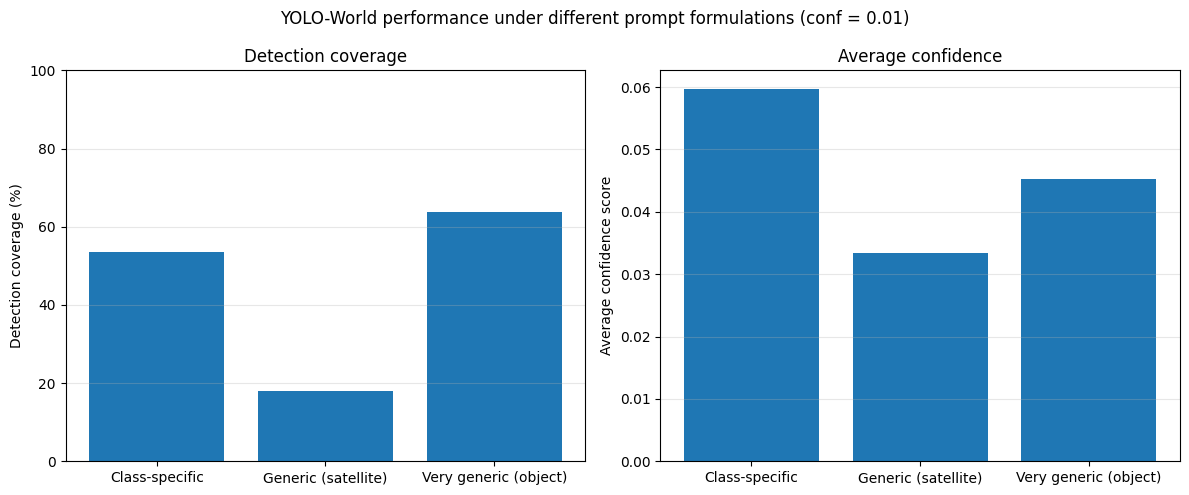

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Coverage
axes[0].bar(prompt_types, coverage)
axes[0].set_ylabel("Detection coverage (%)")
axes[0].set_title("Detection coverage")
axes[0].set_ylim(0, 100)
axes[0].grid(axis="y", alpha=0.3)

# Confidence
axes[1].bar(prompt_types, avg_conf)
axes[1].set_ylabel("Average confidence score")
axes[1].set_title("Average confidence")
axes[1].grid(axis="y", alpha=0.3)

fig.suptitle("YOLO-World performance under different prompt formulations (conf = 0.01)")
plt.tight_layout()
plt.show()
